## Посмотрим на ключевые статистики по датасету и на его примеры

In [1]:
# !pip install -r ../requirements.txt

In [2]:
from datasets import load_dataset, Audio as HFAudio
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import Audio, display

ds = load_dataset("arood0/mmm_project_with_audio_ru_final", split="train")
ds

/Users/gab1k/Desktop/voice-image-editor/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset({
    features: ['IMAGE_ID', 'EDITING_TYPE', 'CORE', 'MASK', 'EDITING_INSTRUCTION', 'OUTPUT_DESCRIPTION', 'INPUT_CAPTION_BY_LLAMA', 'OUTPUT_CAPTION_BY_LLAMA', 'INPUT_IMG', 'MASK_IMG', 'OUTPUT_IMG', 'EDITING_INSTRUCTION_RU', 'audio'],
    num_rows: 2000
})

In [3]:
ds.features

{'IMAGE_ID': Value(dtype='string', id=None),
 'EDITING_TYPE': Value(dtype='string', id=None),
 'CORE': Value(dtype='int32', id=None),
 'MASK': Value(dtype='int32', id=None),
 'EDITING_INSTRUCTION': Value(dtype='string', id=None),
 'OUTPUT_DESCRIPTION': Value(dtype='string', id=None),
 'INPUT_CAPTION_BY_LLAMA': Value(dtype='string', id=None),
 'OUTPUT_CAPTION_BY_LLAMA': Value(dtype='string', id=None),
 'INPUT_IMG': Image(mode=None, decode=True, id=None),
 'MASK_IMG': Image(mode=None, decode=True, id=None),
 'OUTPUT_IMG': Image(mode=None, decode=True, id=None),
 'EDITING_INSTRUCTION_RU': Value(dtype='string', id=None),
 'audio': Audio(sampling_rate=None, mono=True, decode=True, id=None)}

In [4]:
for k, v in ds[0].items():
    print(f"- {k}: {type(v)}")

- IMAGE_ID: <class 'str'>
- EDITING_TYPE: <class 'str'>
- CORE: <class 'int'>
- MASK: <class 'int'>
- EDITING_INSTRUCTION: <class 'str'>
- OUTPUT_DESCRIPTION: <class 'str'>
- INPUT_CAPTION_BY_LLAMA: <class 'str'>
- OUTPUT_CAPTION_BY_LLAMA: <class 'str'>
- INPUT_IMG: <class 'PIL.JpegImagePlugin.JpegImageFile'>
- MASK_IMG: <class 'PIL.PngImagePlugin.PngImageFile'>
- OUTPUT_IMG: <class 'PIL.PngImagePlugin.PngImageFile'>
- EDITING_INSTRUCTION_RU: <class 'str'>
- audio: <class 'dict'>


In [5]:
df = ds.to_pandas()
df.shape

(2000, 13)

In [6]:
for col in ["INPUT_IMG", "OUTPUT_IMG", "EDITING_INSTRUCTION_RU", "audio"]:
    if col not in df.columns:
        continue
    print(f"В столбце {col} отсутствуют {df[col].isna().sum()} значений")

В столбце INPUT_IMG отсутствуют 0 значений
В столбце OUTPUT_IMG отсутствуют 0 значений
В столбце EDITING_INSTRUCTION_RU отсутствуют 0 значений
В столбце audio отсутствуют 0 значений


In [7]:
df["IMAGE_ID"].nunique()

2000

In [8]:
df["EDITING_TYPE"].value_counts()

EDITING_TYPE
Remove      828
Replace     446
Action      300
Add         232
Counting    108
Relation     86
Name: count, dtype: int64

### Статистика по текстовым инструкциям

In [9]:
for col in ["EDITING_INSTRUCTION", "EDITING_INSTRUCTION_RU"]:
    if col not in df.columns:
        continue
    print(f"{'-' * 20}\n{col}")
    lengths = df[col].fillna("").astype(str).str.len()
    print(f"empty={(lengths == 0).sum()}, min={lengths.min()}, p10={lengths.quantile(0.1)} mean={lengths.mean()}, p90={lengths.quantile(0.9)}, max={lengths.max()}")


--------------------
EDITING_INSTRUCTION
empty=0, min=8, p10=14.0 mean=27.057, p90=44.0, max=111
--------------------
EDITING_INSTRUCTION_RU
empty=0, min=10, p10=12.0 mean=25.072, p90=42.0, max=101


### Статистика по изображениям


In [10]:
for col in ["INPUT_IMG", "OUTPUT_IMG"]:
    print(f"{'-' * 20}\n{col}")
    widths = []
    heights = []
    aspect_ratios = []
    for i in range(ds.shape[0]):
        img = ds[i][col]
        if not isinstance(img, Image.Image):
            raise ValueError("Image is not a PIL.Image.Image")
        w, h = img.size
        
        widths.append(w)
        heights.append(h)
        aspect_ratios.append(w / h)

    print(f"sample_count={len(widths)}\nwidth_mean={np.mean(widths)}, height_mean={np.mean(heights)}, widths_mean={np.mean(widths)}, aspect_ratio_mean={np.mean(aspect_ratios)}")
    print(f"width_min={np.min(widths)}, height_min={np.min(heights)}, aspect_ratio_min={np.min(aspect_ratios)}")
    print(f"width_max={np.max(widths)}, height_max={np.max(heights)}, aspect_ratio_max={np.max(aspect_ratios)}")

--------------------
INPUT_IMG
sample_count=2000
width_mean=1740.132, height_mean=1740.2975, widths_mean=1740.132, aspect_ratio_mean=0.9999446926666988
width_min=500, height_min=500, aspect_ratio_min=0.9457659372026641
width_max=7201, height_max=7200, aspect_ratio_max=1.001926782273603
--------------------
OUTPUT_IMG
sample_count=2000
width_mean=1024.0, height_mean=1024.0, widths_mean=1024.0, aspect_ratio_mean=1.0
width_min=1024, height_min=1024, aspect_ratio_min=1.0
width_max=1024, height_max=1024, aspect_ratio_max=1.0


### Статистика по времени аудио

In [11]:
durations = []
for i in range(len(ds)):
    a = ds[i]["audio"]
    sr = a["sampling_rate"]
    n_samples = len(a["array"])
    durations.append(n_samples / sr)
durations = np.array(durations, dtype=np.float32)
print(f"min={float(durations.min())}, p10={float(np.quantile(durations, 0.10))}, mean={float(durations.mean())}, p90={float(np.quantile(durations, 0.9))},  max={float(durations.max())}")

min=0.574999988079071, p10=1.0625, mean=1.7831811904907227, p90=2.737499952316284,  max=6.112500190734863


### Смэплы данных

--------------------
Сэмпл номер 1787
EN: Remove the shoes.
RU: Снимите обувь.


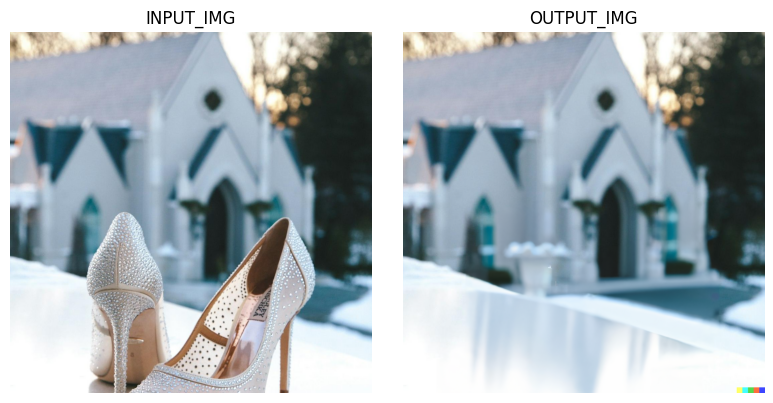

--------------------
Сэмпл номер 1823
EN: Remove the aircraft.
RU: Уберите самолет.


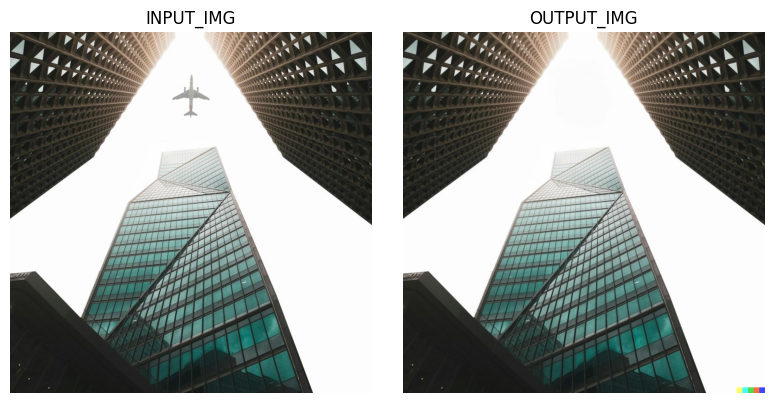

--------------------
Сэмпл номер 1875
EN: Change the clothes to pink.
RU: Переоденься на розовый.


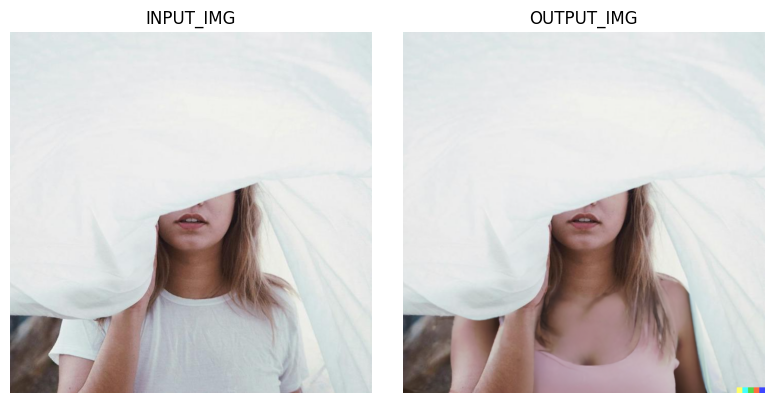

In [12]:
indices = np.random.choice(len(ds), size=3, replace=False)

for idx in indices:
    sample = ds[int(idx)]

    print("-" * 20)
    print(f"Сэмпл номер {idx}")
    print("EN:", sample["EDITING_INSTRUCTION"])
    print("RU:", sample["EDITING_INSTRUCTION_RU"])

    audio = sample["audio"]
    display(Audio(audio["array"], rate=audio["sampling_rate"]))

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(sample["INPUT_IMG"])
    axes[0].set_title("INPUT_IMG")
    axes[0].axis("off")

    axes[1].imshow(sample["OUTPUT_IMG"])
    axes[1].set_title("OUTPUT_IMG")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()
